In [12]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.Variable([[0.4, 0.2, 0.4]])
w = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]
                ])
b = tf.Variable([[0.1, 0.2]])

xwb = tf.matmul(x, w)+b

y = tf.nn.relu(tf.matmul(x, w)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('xwb:'); print(sess.run(xwb))
    print('y:'); print(sess.run(y))

xwb:
[[-0.35999998  0.28      ]]
y:
[[ 0.    0.28]]


In [3]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([[-0.5, -0.2],
                 [-0.3,  0.4],
                 [-0.5,  0.2]
                ])
b = tf.Variable([[0.1, 0.2]])
XWb = tf.matmul(X,W)+b
Y = tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:'); print(sess.run(XWb))
    print('Y:'); print(sess.run(Y))

XWb:
[[-0.35999998  0.28      ]]
Y:
[[ 0.41095957  0.56954622]]


In [9]:
ww = tf.Variable(tf.random_normal([3,2]))
bb = tf.Variable(tf.random_normal([1,2]))
xx = tf.Variable([[0.2,0.4,0.2]])
yy = tf.nn.relu(tf.matmul(xx,ww)+bb)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    (_b, _w, _y) = sess.run((bb, ww, yy))
    print('b:'); print(_b)
    print('w:'); print(_w)
    print('y:'); print(_y)

b:
[[ 1.27223253 -0.53364325]]
w:
[[ 0.29331958 -0.80201513]
 [-1.84564626 -0.40228581]
 [ 0.85034633  0.71491617]]
y:
[[ 0.76270717  0.        ]]


[ 1.33079481  0.93861496  2.03538179 -0.68937963 -0.06544278]


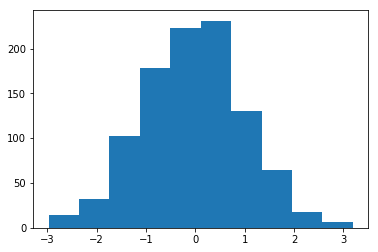

In [11]:
ts_norm = tf.random_normal([1000])
with tf.Session() as sess:
    norm_data = ts_norm.eval()
print(norm_data[:5])

import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

In [17]:
w = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([1,2]))
x = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(x,w)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    x_array = np.array([[0.4, 0.2, 0.4],
                        [0.3, 0.4, 0.5],
                        [0.3,-0.4, 0.5]
                       ])
    (_b, _w, _x, _y) = sess.run((b, w, x, y), feed_dict={x:x_array})
    print('b:'); print(_b)
    print('w:'); print(_w)
    print('y:'); print(_y)

b:
[[ 0.16413476  0.42374992]]
w:
[[ 0.10338411  2.09208941]
 [ 0.80677694  0.61417925]
 [-0.57354897  0.71625936]]
y:
[[ 0.1374242   1.66992533]
 [ 0.2310863   1.65517807]
 [ 0.          1.16383481]]


In [18]:
def layer(output_dim, input_dim, inputs, activation=None):
    w = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    xwb = tf.matmul(inputs, w) + b
    if activation is None:
        outputs = xwb
    else:
        outputs = activation(xwb)
    return outputs

In [19]:
x = tf.placeholder('float', [None,4])
h = layer(output_dim=3, input_dim=4, inputs=x, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    x_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_x, layer_h, layer_y) = \
                     sess.run((x, h, y), feed_dict={x:x_array})
    print('X:', layer_x)
    print('h:', layer_h)
    print('y:', layer_y)

X: [[ 0.40000001  0.2         0.40000001  0.5       ]]
h: [[ 0.50740123  0.          0.29733428]]
y: [[-0.22554985  1.45171356]]
